### 단순 선형 회귀

In [1]:
import pandas as pd

advertising = pd.read_csv('data/advertising.csv')
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
# 행과 열을 바꿔서 통계정보 확인
advertising.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


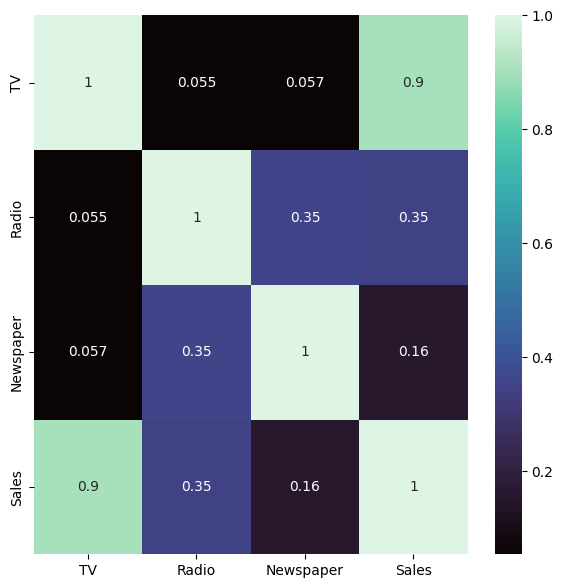

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# 컬럼 간 상관계수 확인
plt.figure(figsize=(7, 7))
sns.heatmap(advertising.corr(), annot=True, cmap='mako')
plt.show()

In [6]:
# 상관 관계가 높은 속성을 내림 차순으로 정렬하여 시각화
corr_sort = advertising.corr()[['Sales']].sort_values(by='Sales', ascending=False)
corr_sort

,Sales
Sales,1.000000
TV,0.901208
Radio,0.349631
Newspaper,0.157960


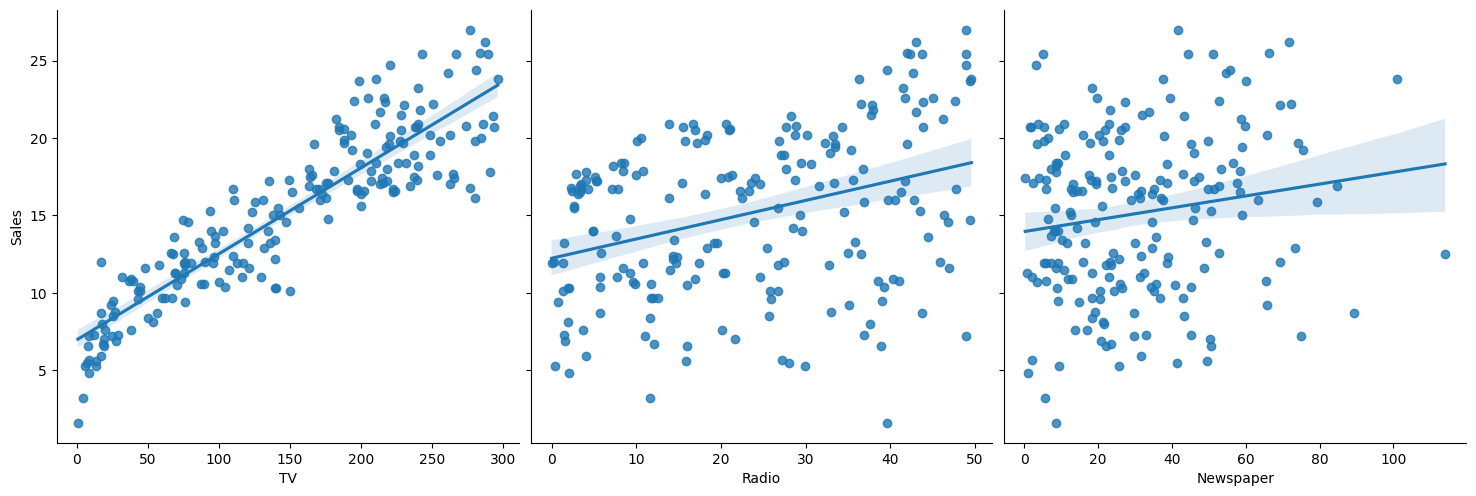

In [11]:
# 'TV', 'Radio', 'Newspaper'의 판매량 pairplot의 세개의 그래프만 그리면서 산점도와 함께 선형회귀선 포함하여 시각화하기
sns.pairplot(data=advertising, height=5, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', kind='reg')
plt.show()

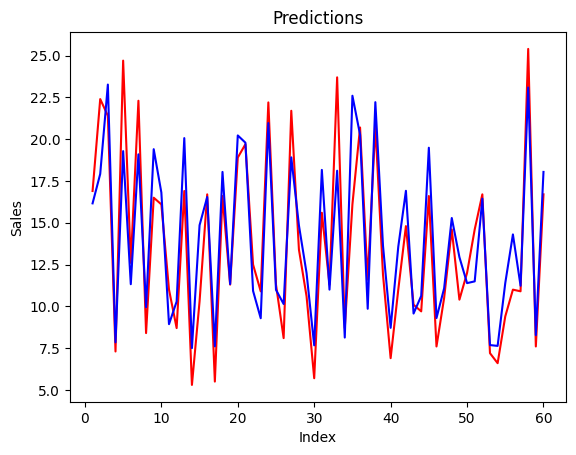

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 독립변수로 TV 컬럼만 사용
X_data1 = advertising[['TV']]

# 종속변수로 Sales 데이터 사용
y_data1 = advertising['Sales']

# 훈련 데이터와 테스트 데이터를 7:3 비율로 나누기, random_state = 42
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_data1, y_data1, test_size=0.3, random_state=42)

lr_model1 = LinearRegression()
# 선형 회귀 모델 학습
lr_model1.fit(X_train1, y_train1)

# 예측값 구하기
y_pred1 = lr_model1.predict(X_test1)

# 예측값과 실제값 비교
c = [i for i in range(1, 61, 1)]
plt.plot(c, y_test1, color = 'r') # 실제값
plt.plot(c, y_pred1, color = 'b') # 예측값
plt.xlabel('Index') # X축 이름
plt.ylabel('Sales') # Y축 이름
plt.title('Predictions') # 그래프 제목
plt.show()

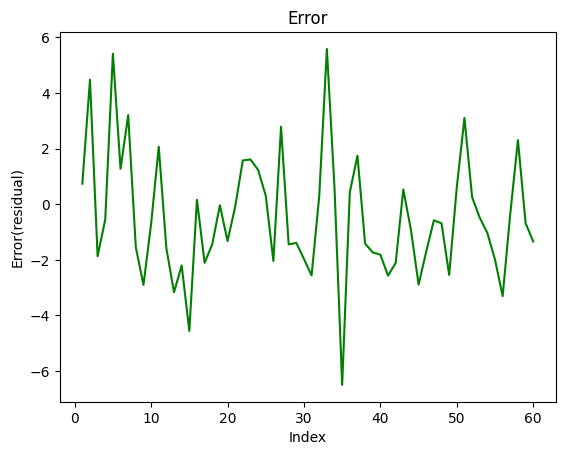

In [16]:
# 오차 그래프 그리기
error = y_test1 - y_pred1

plt.plot(c, error, color = 'g')
plt.xlabel('Index')
plt.ylabel('Error(residual)')
plt.title('Error')
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# 평가 지표
print(f'MSE: {mean_squared_error(y_test1, y_pred1):.2f}')  # 평균 제곱 오차(MSE)
print(f'r2_score: {r2_score(y_test1, y_pred1):.2f}')       # 결정계수(R2)

w1 = lr_model1.coef_ # 기울기
print(f'slopes of TV: {w1[0]:.2f}')

b1 = lr_model1.intercept_ # y 절편
print('Intercept is:', b1.round(2))

MSE: 5.18
r2_score: 0.81
slopes of TV: 0.05
Intercept is: 7.21


### 다중 선형 회귀

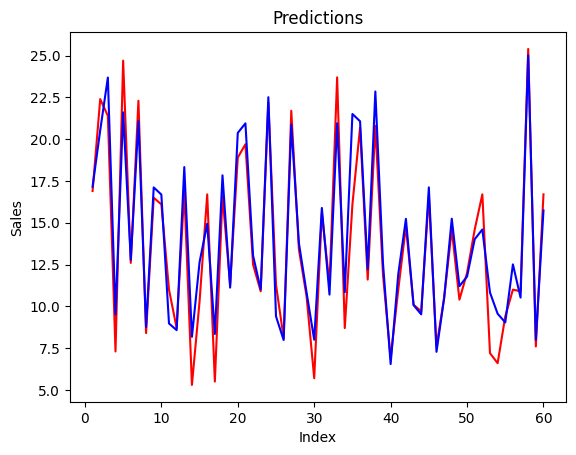

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_data2 = advertising.drop(['Sales'], axis=1)
y_data2 = advertising['Sales']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_data2, y_data2, test_size=0.3, random_state=42)

# 속성값 차이를 맞추기 위한 표준화
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train2)
X_test_scaled = scaler.transform(X_test2)

# 모델 생성하고 학습시키기
lr_model2 = LinearRegression()
lr_model2.fit(X_train_scaled, y_train2)

y_pred2 = lr_model2.predict(X_test_scaled)

# 예측값과 실제값 비교
c = [i for i in range(1, 61, 1)]
plt.plot(c, y_test2, color = 'r') # 실제값
plt.plot(c, y_pred2, color = 'b') # 예측값
plt.xlabel('Index') # X축 이름
plt.ylabel('Sales') # Y축 이름
plt.title('Predictions') # 그래프 제목
plt.show()

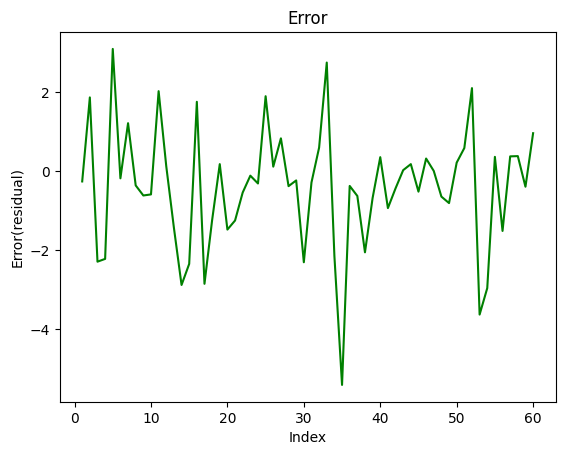

In [21]:
# 오차 그래프 그리기
error = y_test2 - y_pred2

plt.plot(c, error, color = 'g')
plt.xlabel('Index')
plt.ylabel('Error(residual)')
plt.title('Error')
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# 평가 지표
print(f'MSE: {mean_squared_error(y_test2, y_pred2):.2f}')  # 평균 제곱 오차(MSE)
print(f'r2_score: {r2_score(y_test2, y_pred2):.2f}')       # 결정계수(R2)

w1 = lr_model2.coef_ # 기울기
print(f'slopes of TV: {w1[0]:.2f}')
print(f'slopes of Radio: {w1[1]:.2f}')
print(f'slopes of Newspaper: {w1[2]:.2f}')

b1 = lr_model2.intercept_ # y 절편
print('Intercept is:', b1.round(2))

MSE: 2.54
r2_score: 0.91
slopes of TV: 4.48
slopes of Radio: 1.50
slopes of Newspaper: 0.16
Intercept is: 15.78


### 다항 선형 회귀
#### PolynomialFeatures
기존 입력 특성(feature)을 기반으로 다항식 항과 상호작용(interaction) 항을 자동으로 생성해주는 클래스   
선형 모델도 비선형 관계를 학습할 수 있게 됨
- degree : 다항식의 최대 차수 (기본값 2)
- 예 : degree=2 → x, y라면 x^2, xy, y^2까지 생성
- interaction_only : True일 경우 자기 자신을 제곱하는 항은 제외하고, 상호작용 항만 생성
- 예 : x^2, y^2 제외, xy만 포함
- include_bias : True일 경우 상수항(1)을 추가
- order : 출력 배열의 순서 지정 ('C' 또는 'F')

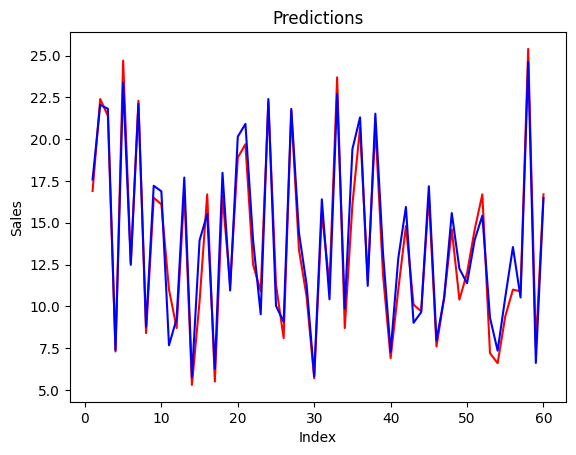

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

X_data3 = advertising.drop(['Sales'], axis=1)
y_data3 = advertising['Sales']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X_data3, y_data3, test_size=0.3, random_state=42)

# 다항식 항 + 상호작용 항 생성
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train3)
X_test_poly = poly.transform(X_test3)

# 속성값 차이를 맞추기 위한 표준화
scaler = StandardScaler()

X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

# 모델 생성하고 학습시키기
lr_model3 = LinearRegression()
lr_model3.fit(X_train_poly_scaled, y_train3)

y_pred3 = lr_model3.predict(X_test_poly_scaled)

# 예측값과 실제값 비교
c = [i for i in range(1, 61, 1)]
plt.plot(c, y_test3, color = 'r') # 실제값
plt.plot(c, y_pred3, color = 'b') # 예측값
plt.xlabel('Index') # X축 이름
plt.ylabel('Sales') # Y축 이름
plt.title('Predictions') # 그래프 제목
plt.show()

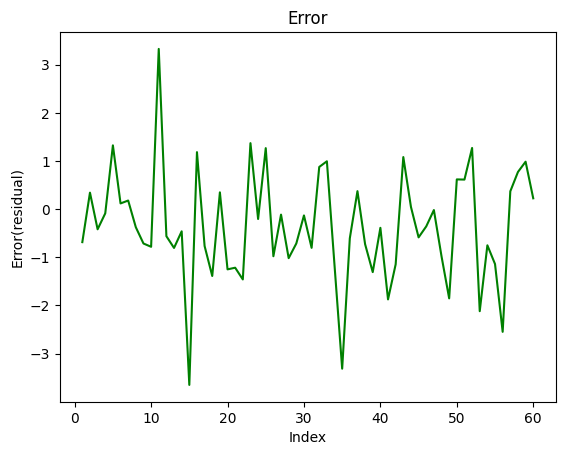

In [22]:
# 오차 그래프 그리기
error = y_test3 - y_pred3

plt.plot(c, error, color = 'g')
plt.xlabel('Index')
plt.ylabel('Error(residual)')
plt.title('Error')
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# 평가 지표
print(f'MSE: {mean_squared_error(y_test3, y_pred3):.2f}')  # 평균 제곱 오차(MSE)
print(f'r2_score: {r2_score(y_test3, y_pred3):.2f}')       # 결정계수(R2)

w1 = lr_model3.coef_ # 기울기
print(f'slopes of TV: {w1[0]:.2f}')
print(f'slopes of Radio: {w1[1]:.2f}')
print(f'slopes of Newspaper: {w1[2]:.2f}')

b1 = lr_model2.intercept_ # y 절편
print('Intercept is:', b1.round(2))

MSE: 1.50
r2_score: 0.95
slopes of TV: 6.59
slopes of Radio: -0.80
slopes of Newspaper: 0.02
Intercept is: 15.78


### 규제

In [26]:
# 규제
from sklearn.linear_model import Ridge

model_ridge = Ridge(alpha=10)
model_ridge.fit(X_train_poly_scaled, y_train3)

,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",10
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None
,"tol tol: float, default=1e-4The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for each solver:- 'svd': `tol` has no impact.- 'cholesky': `tol` has no impact.- 'sparse_cg': norm of residuals smaller than `tol`.- 'lsqr': `tol` is set as atol and btol of scipy.sparse.linalg.lsqr, which control the norm of the residual vector in terms of the norms of matrix and coefficients.- 'sag' and 'saga': relative change of coef smaller than `tol`.- 'lbfgs': maximum of the absolute (projected) gradient=max|residuals| smaller than `tol`... versionchanged:: 1.2 Default value changed from 1e-3 to 1e-4 for consistency with other linear models.",0.0001
,"solver solver: {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'}, default='auto'Solver to use in the computational routines:- 'auto' chooses the solver automatically based on the type of data.- 'svd' uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than 'cholesky' at the cost of being slower.- 'cholesky' uses the standard :func:`scipy.linalg.solve` function to obtain a closed-form solution.- 'sparse_cg' uses the conjugate gradient solver as found in :func:`scipy.sparse.linalg.cg`. As an iterative algorithm, this solver is more appropriate than 'cholesky' for large-scale data (possibility to set `tol` and `max_iter`).- 'lsqr' uses the dedicated regularized least-squares routine :func:`scipy.sparse.linalg.lsqr`. It is the fastest and uses an iterative procedure.- 'sag' uses a Stochastic Average Gradient descent, and 'saga' uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that 'sag' and 'saga' fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from :mod:`sklearn.preprocessing`.- 'lbfgs' uses L-BFGS-B algorithm implemented in :func:`scipy.optimize.minimize`. It can be used only when `positive` is True.All solvers except 'svd' support both dense and sparse data. However, only'lsqr', 'sag', 'sparse_cg', and 'lbfgs' support sparse input when`fit_intercept` is True... versionadded:: 0.17 Stochastic Average Gradient descent solver... versionadded:: 0.19 SAGA solver.",'auto'
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.Only 'lbfgs' solver is supported in this case.",False
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag' or 'saga' to shuffle the data.See :term:`Glossary ` for details... versionadded:: 0.17 `random_state` to support Stochastic Average Gradient.",None


In [27]:
y_ridge_pred = model_ridge.predict(X_test_poly_scaled)

In [28]:
print(f'MSE: {mean_squared_error(y_test3, y_ridge_pred):.2f}') # 평균 제곱 오차(MSE)
print(f'r2_score: {r2_score(y_test3, y_ridge_pred):.2f}') # 결정계수(R2)

MSE: 2.15
r2_score: 0.92
